In [7]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
import sys
# Replace these values with your actual database information
hostname = "gator3228.hostgator.com"
username = "rbrennan_sm_bcd"
password = "This_is_not_the_password"
database = "rbrennan_stock_project_4"
# Create a database connection
db_url = f"mysql+mysqlconnector://{username}:{password}@{hostname}/{database}"
engine = create_engine(db_url)
# Test the connection
try:
    conn = engine.connect()
    print("Connected to MySQL database")
except Exception as e:
    print("Error:", e)
amzn_df = pd.read_sql("SELECT * FROM Amazon", conn)
amzn_df

Exception during reset or similar
Traceback (most recent call last):
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\sqlalchemy\pool\base.py", line 739, in _finalize_fairy
    fairy._reset(pool)
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\sqlalchemy\pool\base.py", line 988, in _reset
    pool._dialect.do_rollback(self)
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\sqlalchemy\engine\default.py", line 682, in do_rollback
    dbapi_connection.rollback()
  File "c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\mysql\connector\connection_cext.py", line 517, in rollback
    self._cmysql.rollback()
_mysql_connector.MySQLInterfaceError: Lost connection to MySQL server during query


Connected to MySQL database


,Date,Open,High,Low,Close,Volume
0,2018-02-20,72.324501,74.438499,72.324501,73.417503,129984000
1,2018-02-21,74.250000,75.174500,73.945999,74.146004,126088000
2,2018-02-22,74.767998,75.126999,73.788002,74.266998,97162000
3,2018-02-23,74.766998,75.000000,74.324997,75.000000,88362000
4,2018-02-26,75.459999,76.141998,75.349998,76.097504,99100000
...,...,...,...,...,...,...
1399,2023-09-12,142.320007,143.000000,140.610001,141.229996,42668500
1400,2023-09-13,140.949997,144.979996,140.869995,144.850006,60465200
1401,2023-09-14,145.080002,145.860001,142.949997,144.720001,64033600
1402,2023-09-15,142.690002,143.570007,140.089996,140.389999,102861700


In [8]:
# using Arima model created by Dario
amzn_info = amzn_df.info()
print(amzn_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1404 entries, 0 to 1403
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1404 non-null   datetime64[ns]
 1   Open    1404 non-null   float64       
 2   High    1404 non-null   float64       
 3   Low     1404 non-null   float64       
 4   Close   1404 non-null   float64       
 5   Volume  1404 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 65.9 KB
None


In [9]:
amzn_df.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-20,72.324501,74.438499,72.324501,73.417503,129984000
1,2018-02-21,74.250000,75.174500,73.945999,74.146004,126088000
2,2018-02-22,74.767998,75.126999,73.788002,74.266998,97162000
3,2018-02-23,74.766998,75.000000,74.324997,75.000000,88362000
4,2018-02-26,75.459999,76.141998,75.349998,76.097504,99100000


In [10]:
# Define the ARIMA model parameters
p = 1
d = 1
q = 2

In [11]:
train_data, test_data = amzn_df[0:int(len(amzn_df)*0.9)], amzn_df[int(len(amzn_df)*0.9):]


train_arima = train_data['Open']
test_arima = test_data['Open']


history = [x for x in train_arima]
y = test_arima

In [12]:
model = ARIMA(history, order=(5,1,10))
model_fit = model.fit()

c:\Users\bchau\anaconda3\envs\dev\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
# make first prediction
predictions = list()
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]

    print(yhat)

    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)

93.65838780674493


KeyError: 1

ValueError: x and y must have same first dimension, but have shapes (140,) and (1,)

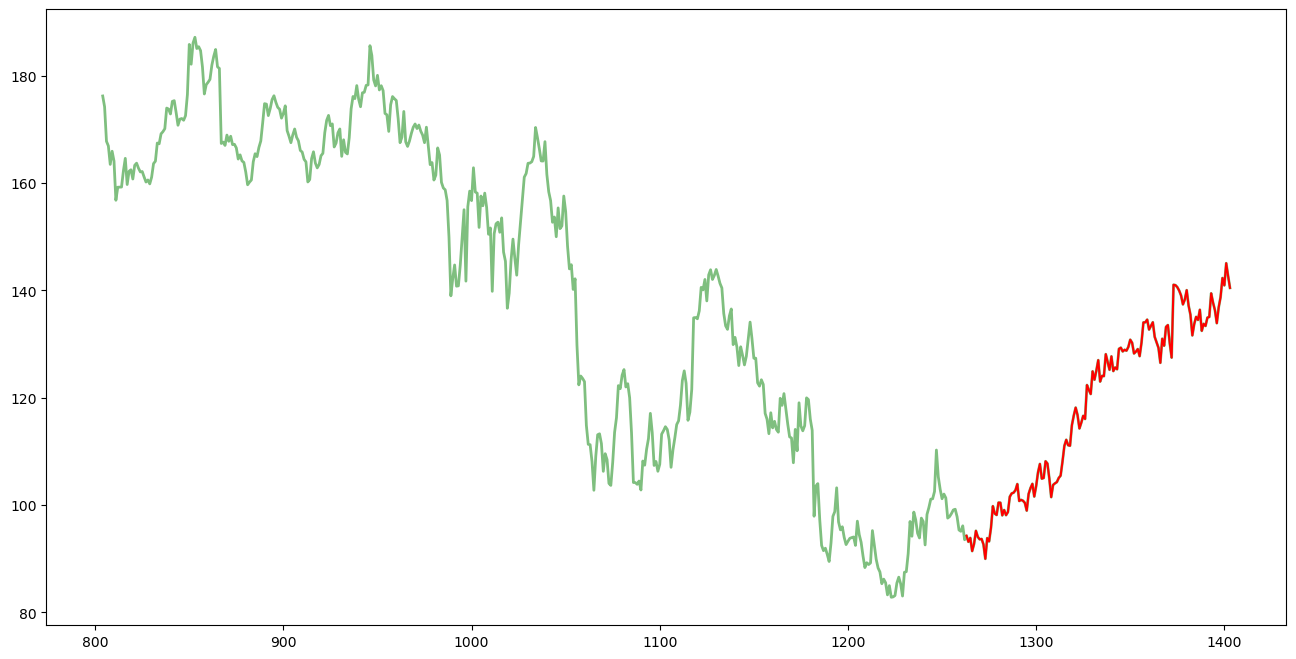

In [15]:
plt.figure(figsize=(16,8))
plt.plot(amzn_df.index[-600:], amzn_df['Open'].tail(600), 'g-',alpha=0.5,linewidth=2,label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index[:-1], predictions, 'b1-', alpha=0.5,label = 'Predicted Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.grid(True)
#plt.savefig('arima_model.pdf')
plt.show()